In [1]:
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.decomposition import PCA
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# Q1

In [2]:
sound_intensity = np.array([2, 5, 10, 14, 19, 23, 34, 45, 55, 70, 85, 98])
difference_threshold = np.array([2.2, 3.1, 3.9, 2.94, 3.45, 3.45, 4.67, 5.85, 7.70, 9.80, 11.90, 13.72])
print(len(sound_intensity))
print(len(difference_threshold))

12
12


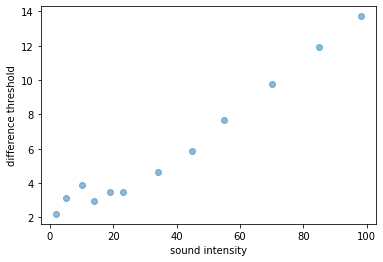

In [3]:
plt.xlabel("sound intensity")
plt.ylabel("difference threshold")
plt.scatter(sound_intensity, difference_threshold, alpha=0.5, marker='o')

The coefficients of Weber's Law is 0.11691606367583213


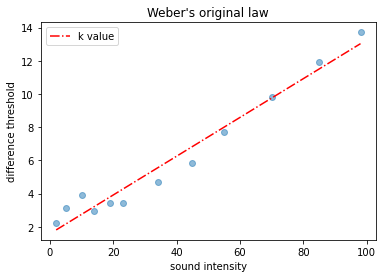

In [5]:
# k = delta_I / I
# delta_I: difference in threshold
# I initial stimulus intensity
# 1/k = I / delta_I ==> still linear
# http://apps.usd.edu/coglab/WebersLaw.html

sound_intensity = sound_intensity.reshape(-1, 1)
difference_threshold = difference_threshold.reshape(-1, 1)

lr = LinearRegression().fit(sound_intensity, difference_threshold)
k = lr.coef_
print("The coefficients of Weber's Law is", (k[0])[0])

plt.title('Weber\'s original law')
plt.xlabel("sound intensity")
plt.ylabel("difference threshold")
predicted_difference_threshold = lr.predict(sound_intensity).flatten()
plt.scatter(sound_intensity, difference_threshold, alpha=0.5, marker='o')
plt.plot(sound_intensity, predicted_difference_threshold,'r-.', label='k value')
plt.legend()

# Q3

In [56]:
gender_strength_idx = np.loadtxt("GenderStrengthIndex.txt")
print(len(gender_strength_idx))

298


In [57]:
image_data = np.loadtxt("image_data.txt")
print(image_data.shape)

(298, 2500)


In [58]:
mean_face = np.zeros((1, 50*50), dtype=np.uint8)

for i in range(image_data.shape[0]):
    mean_face = np.add(mean_face, image_data[i,:])

mean_face = np.divide(mean_face,float(image_data.shape[0])).flatten()

In [59]:
substracted_image_data = np.ndarray((image_data.shape))
for i in range(image_data.shape[0]):
  substracted_image_data[i, :] = image_data[i, :] - mean_face

print(substracted_image_data.shape)

(298, 2500)


In [60]:
pca = PCA()
projected = pca.fit_transform(substracted_image_data.T)
top15_variance = sum(pca.explained_variance_ratio_[:15])
print(top15_variance)

0.6501841771111935


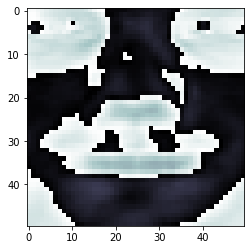

In [61]:
reconstructed = np.dot(projected[:, :15], pca.components_[:15]).T
plt.imshow((reconstructed[3].reshape((50, 50)).T).astype(np.uint8), cmap=plt.cm.bone)

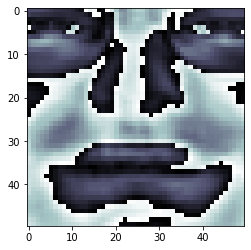

In [62]:
plt.imshow((reconstructed[76].reshape((50, 50)).T).astype(np.uint8), cmap=plt.cm.bone)

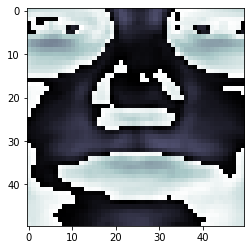

In [63]:
plt.imshow((reconstructed[262].reshape((50, 50)).T).astype(np.uint8), cmap=plt.cm.bone)

(298, 298)
(298,)


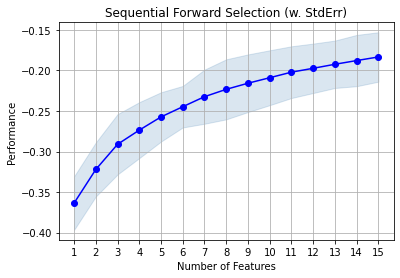

In [64]:
X = pca.components_.T
y = gender_strength_idx

print(X.shape)
print(y.shape)

lr = LinearRegression()

sfs = SFS(lr, 
          k_features=15, 
          forward=True, 
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=5)

sfs = sfs.fit(X, y)

fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [65]:
k_features = 15

X = pca.components_[: k_features,].T
print(X.shape)

lr = LinearRegression().fit(X, y)
print(lr.coef_)
print(lr.intercept_)

(298, 15)
[ 2.92360111 -4.52988463 -1.44744751 -2.24632789 -0.5067986   1.07912272
  0.79990116 -1.46560124 -2.38534458 -0.93380874 -2.20626455  1.770058
 -1.52967352  0.35134421 -1.55251069]
-0.05609025779194626


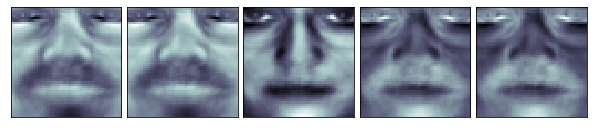

In [66]:
y_list = [-1, -0.5, 0, 0.5, 10]
fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(len(y_list)): 
  ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[])
  y0 = y_list[i]
  X0 = (y0 - lr.intercept_)/lr.coef_
  # print(X0)
  reconstructed = np.dot(projected[:,:15], X0)
  ax.imshow(np.reshape(reconstructed, (50, 50)).T + mean_face.reshape((50, 50)).T, cmap=plt.cm.bone, interpolation='nearest')

# Q4

In [73]:
gsi = np.loadtxt("GenderStrengthIndex.txt")
print(len(gsi))

298


In [75]:
bins_male = []
gsi_male = gsi[:149]
for i in range(4):
    mask = ((-1 + i*0.5) <= gsi_male) & (gsi_male < (-0.5 + i*0.5))
    bin = len(gsi_male[mask])
    bins_male.append(bin)

bins_male

[98, 41, 6, 4]

In [77]:
bins_female = []
gsi_female = gsi[149:]
for i in range(4):
    mask = ((-1 + i*0.5) <= gsi_female) & (gsi_female < (-0.5 + i*0.5))
    bin = len(gsi_female[mask])
    bins_female.append(bin)

bins_female

[1, 13, 64, 71]

In [85]:
bins = pd.DataFrame([bins_male,bins_female], 
                    columns=['-1~-0.5','-0.5~0','0~0.5','0.5~1'],
                    index=['male(noise)','female(signal)'])
display(bins)

,-1~-0.5,-0.5~0,0~0.5,0.5~1
male(noise),98,41,6,4
female(signal),1,13,64,71


In [86]:
bins = bins.values
bins

array([[98, 41,  6,  4],
       [ 1, 13, 64, 71]])

In [121]:
# set lambda = [-0.5, 0, 0.5]

false_alarm_percentage_sequence, hit_percentage_sequence = [],[]
for i in range(3):
    bins_left = bins[:,:i+1].sum(axis=1)
    bins_right = bins[:,i+1:].sum(axis=1)
    prob = bins_right/149
    false_alarm_percentage_sequence.append(prob[0])
    hit_percentage_sequence.append(prob[1])

In [122]:
false_alarm_percentage_sequence

[0.3422818791946309, 0.06711409395973154, 0.026845637583892617]

In [123]:
hit_percentage_sequence

[0.9932885906040269, 0.9060402684563759, 0.47651006711409394]

In [140]:
# set mu_male = 0, and sigma_male = 1, calculate
# mu_female,  and sigma_female
u_male, sigma_male = 0,1

# convert to normal distribution

# norm.ppf() takes a percentage and returns a standard 
# deviation multiplier for what value that percentage occurs at.

# return a value marking where k% of data points would be contained
# if our data is a normal distribution

# -lambda = phi^{-1} (P(FA))
# d' - lamda = phi^{-1} (P(Hit))
z_Fs,z_Hs = [],[]
for i in range(3):
    z_Hs.append(-norm.ppf(1-hit_sequence[i]))
    z_Fs.append(-norm.ppf(1-false_alarm_sequence[i]))

In [138]:
lr = LinearRegression().fit(np.array(z_Fs).reshape(-1, 1), np.array(z_Hs).reshape(-1, 1))
sigma_female = 1/lr.coef_[0,0]

In [131]:
u_female = lr.coef_[0,0] * lr.intercept_[0]

In [132]:
display(pd.DataFrame([[u_male, sigma_male],[u_female, sigma_female]],columns=['U','Sigma'],index=['male(noise)','female(signal)']))

,U,Sigma
male(noise),0.00000,1.000000
female(signal),4.96839,0.647462


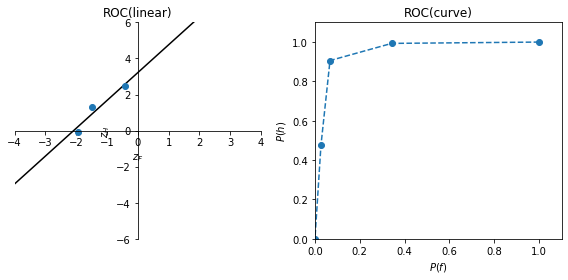

In [139]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(1, 2, 1)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
ax.set_xlabel('$z_F$')
ax.set_ylabel('$z_H$')
ax.set_xlim([-4,4])
ax.set_ylim([-6,6])
x = np.linspace(-4,4,10)
y = lr.coef_[0,0] * x + lr.intercept_[0]
ax.plot(x, y, color='black')
ax.plot(z_Fs, z_Hs, 'o')
ax.set_title('ROC(linear)')

ax1 = fig.add_subplot(1, 2, 2)
ax1.set_xlabel('$P(f)$')
ax1.set_ylabel('$P(h)$')
ax1.set_xlim([0,1.1])
ax1.set_ylim([0,1.1])
x = [1] + fs + [0]
y = [1] + hs + [0]
ax1.plot(x,y,'--o')
ax1.set_title('ROC(curve)')
# plt.show()
plt.tight_layout()